Connected to Python 3.11.3

In [1]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    Lasso,
    LinearRegression,
    LogisticRegression,
    Ridge,
    SGDClassifier,
)

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    r2_score,make_scorer,
    precision_score,recall_score,
    roc_auc_score
)

from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
    minmax_scale,
)

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
relative_path = "src\diabetes.csv"
absolute_path = os.path.join(os.getcwd(), relative_path)
with open(absolute_path, "r") as file:
    df = pd.read_csv(absolute_path)
# print(absolute_path)

print("Dataset shape:")
print(df.shape)

Dataset shape:
(253680, 22)


In [3]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
print("\nFrequency of each label value:")
print(df.Diabetes_012.value_counts())
print("\nDistribution of the target:")
print(df.Diabetes_012.value_counts(normalize=1))
print("\nFeatures:")
print(df.columns)


Frequency of each label value:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [4]:
df.Diabetes_012.replace(2.0, 1.0, inplace=True)
print(df.Diabetes_012.value_counts(normalize=1))
df.columns = df.columns.str.replace(" ", "")

Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64


In [8]:
df.drop(
    ["Fruits", "Veggies", "NoDocbcCost", "Education", "Income"], axis=1, inplace=True
)

print(df.shape)

(253680, 17)


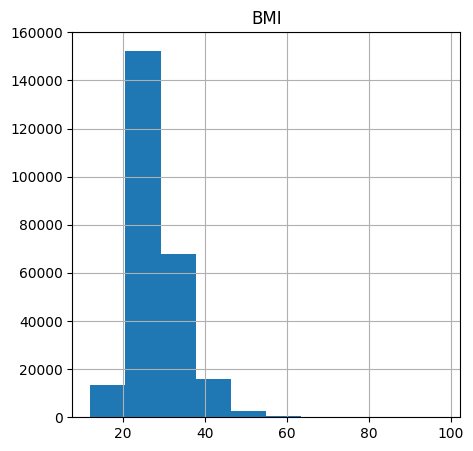

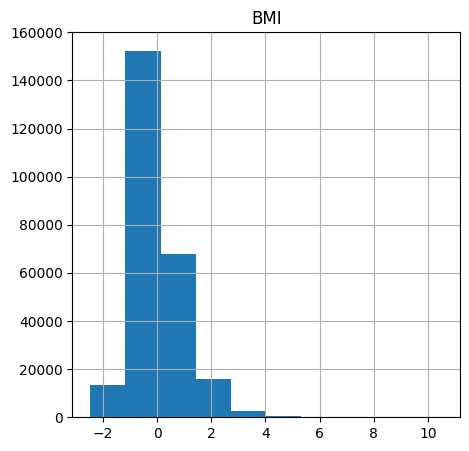

In [5]:
df.hist(column="BMI", figsize=(5, 5))
bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = bmi_scaler.transform(df[cols_to_scale])
fig = df.hist(column="BMI", figsize=(5, 5))

array([[<Axes: title={'center': 'GenHlth'}>]], dtype=object)

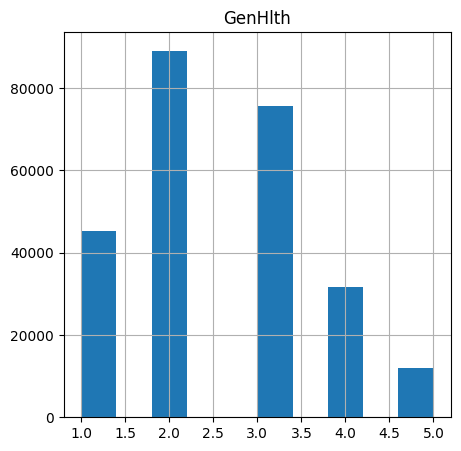

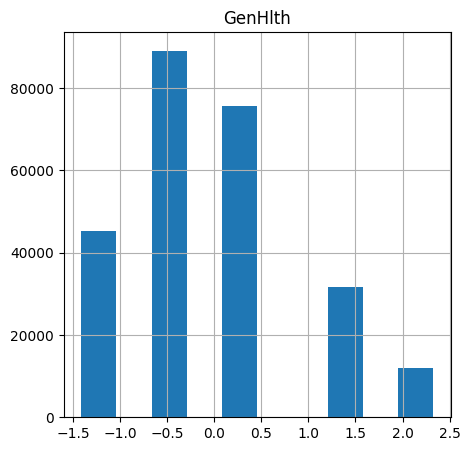

In [6]:
df.hist(column="GenHlth", figsize=(5, 5))
gh_scaler = StandardScaler()
cols_to_scale = ["GenHlth"]
gh_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = gh_scaler.transform(df[cols_to_scale])
df.hist(column="GenHlth", figsize=(5, 5))

array([[<Axes: title={'center': 'MentHlth'}>]], dtype=object)

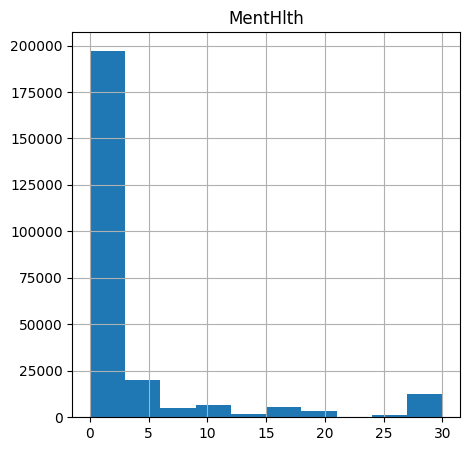

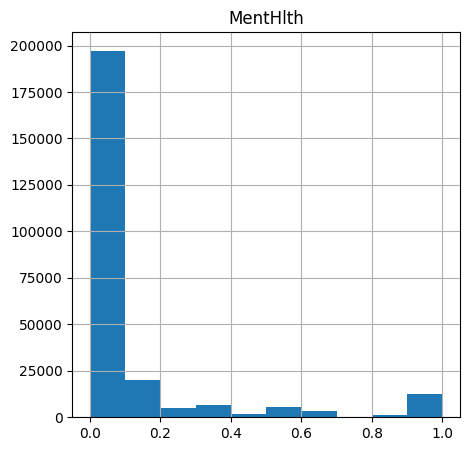

In [7]:
df.hist(column="MentHlth", figsize=(5, 5))
ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = ment_scaler.transform(df[cols_to_scale])
df.hist(column="MentHlth", figsize=(5, 5))

array([[<Axes: title={'center': 'PhysHlth'}>]], dtype=object)

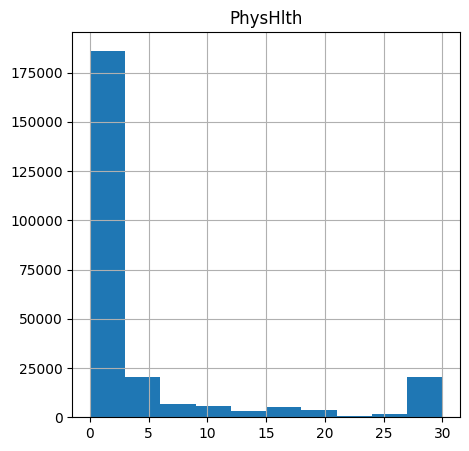

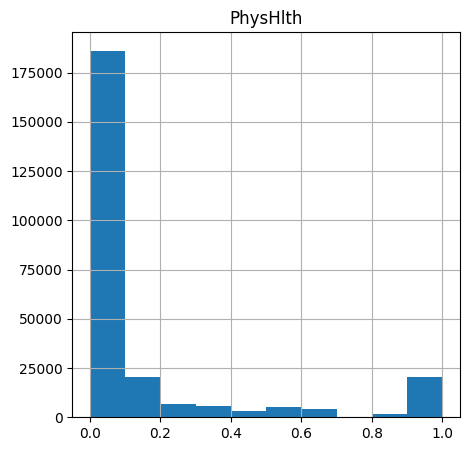

In [8]:
df.hist(column="PhysHlth", figsize=(5, 5))
phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = phys_scaler.transform(df[cols_to_scale])
df.hist(column="PhysHlth", figsize=(5, 5))

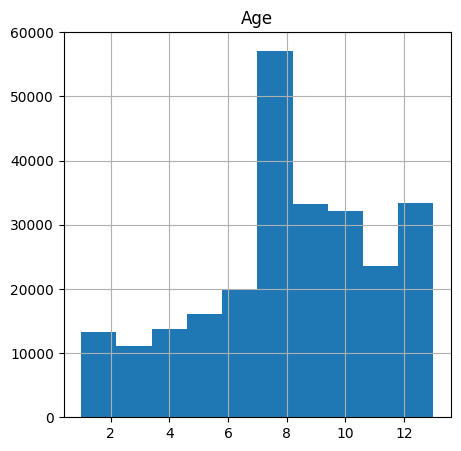

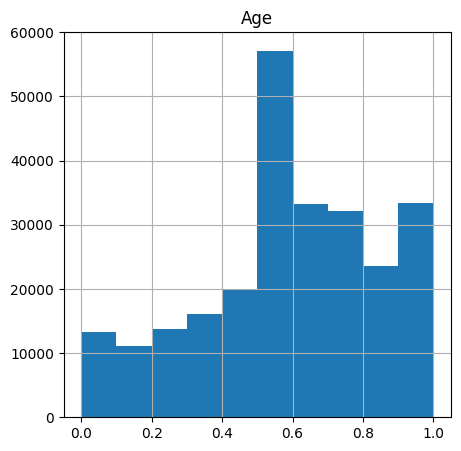

In [9]:
df.hist(column="Age", figsize=(5, 5))
age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = age_scaler.transform(df[cols_to_scale])
df.hist(column="Age", figsize=(5, 5))
import warnings
warnings.filterwarnings("ignore")

In [10]:
df["Sex"].value_counts(normalize=True)

Sex
0.0    0.559658
1.0    0.440342
Name: proportion, dtype: float64

In [11]:
gender = df["Sex"]
gender = gender.values.reshape(-1, 1)
encoder = OneHotEncoder(categories="auto", sparse_output=False)
gender_encoded = encoder.fit_transform(gender)
print(gender_encoded)
gender_encoded_df = pd.DataFrame(
    gender_encoded, columns=encoder.get_feature_names_out(["gender"])
)

df.reset_index(drop=True, inplace=True)
gender_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop("Sex", axis=1), gender_encoded_df], axis=1)
df_encoded

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,gender_0.0,gender_1.0
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,...,0.0,2.329121,0.6,0.500000,1.0,0.666667,4.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,...,1.0,0.457294,0.0,0.000000,0.0,0.500000,6.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,...,1.0,2.329121,1.0,1.000000,1.0,0.666667,4.0,8.0,1.0,0.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,...,0.0,-0.478619,0.0,0.000000,0.0,0.833333,3.0,6.0,1.0,0.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,...,0.0,-0.478619,0.1,0.000000,0.0,0.833333,5.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,2.514516,0.0,0.0,0.0,0.0,1.0,...,0.0,0.457294,0.0,0.166667,0.0,0.333333,6.0,7.0,0.0,1.0
253676,1.0,1.0,1.0,1.0,-1.571019,0.0,0.0,0.0,0.0,0.0,...,0.0,1.393207,0.0,0.000000,1.0,0.833333,2.0,4.0,1.0,0.0
253677,0.0,0.0,0.0,1.0,-0.057858,0.0,0.0,0.0,1.0,1.0,...,0.0,-1.414532,0.0,0.000000,0.0,0.083333,5.0,2.0,1.0,0.0
253678,0.0,1.0,0.0,1.0,-0.814438,0.0,0.0,0.0,0.0,1.0,...,0.0,0.457294,0.0,0.000000,0.0,0.500000,5.0,1.0,0.0,1.0


In [15]:
df_encoded.iloc[:, 0].value_counts(normalize=1)

Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64

In [16]:
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=df_encoded[["gender_0.0", "gender_1.0"]],
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")

smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [17]:
logistic_reg = LogisticRegression()
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "solver": ["saga"],
    "max_iter": [100, 200, 300],
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring="f1_weighted",  # Use F1-score as the scoring metric
    cv=5,
    refit=True,
)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'C': 0.1, 'fit_intercept': False, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
F1-score on test set:  0.763838642348849


In [23]:
coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: gender_0.0, Coefficient: -3.7415268009870846
Feature: gender_1.0, Coefficient: -3.5331639996305713
Feature: Age, Coefficient: 1.9822725441596623
Feature: CholCheck, Coefficient: 1.4403735031064568
Feature: HvyAlcoholConsump, Coefficient: -0.8567598785138014
Feature: HighBP, Coefficient: 0.7033658540896038
Feature: GenHlth, Coefficient: 0.6694882716498081
Feature: HighChol, Coefficient: 0.5748742644242869
Feature: BMI, Coefficient: 0.4995428569025996
Feature: PhysHlth, Coefficient: -0.32444898715261816
Feature: HeartDiseaseorAttack, Coefficient: 0.19917398697553032
Feature: MentHlth, Coefficient: -0.1513568355820325
Feature: DiffWalk, Coefficient: 0.13893831732880416
Feature: PhysActivity, Coefficient: -0.06521998951585527
Feature: AnyHealthcare, Coefficient: 0.03792952540017118
Feature: Stroke, Coefficient: 0.03546091115066506
Feature: Smoker, Coefficient: 0.03027978534297371


In [24]:
relative_path = "src\diabetes.csv"
absolute_path = os.path.join(os.getcwd(), relative_path)
with open(absolute_path, "r") as file:
    df = pd.read_csv(absolute_path)
# print(absolute_path)

print("Dataset shape:")
print(df.shape)
df.isnull().sum()
print("\nFrequency of each label value:")
print(df.Diabetes_012.value_counts())
print("\nDistribution of the target:")
print(df.Diabetes_012.value_counts(normalize=1))
print("\nFeatures:")
print(df.columns)
df.Diabetes_012.replace(2.0, 1.0, inplace=True)
print(df.Diabetes_012.value_counts(normalize=1))
df.columns = df.columns.str.replace(" ", "")
df.drop(
    ["Fruits", "Veggies", "NoDocbcCost", "Education", "Income",'CholCheck','GenHlth','AnyHealthcare','Smoker'], axis=1, inplace=True
)

print(df.shape)

Dataset shape:
(253680, 22)

Frequency of each label value:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64
(253680, 13)


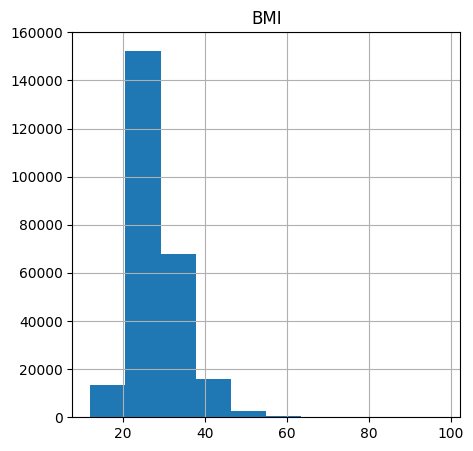

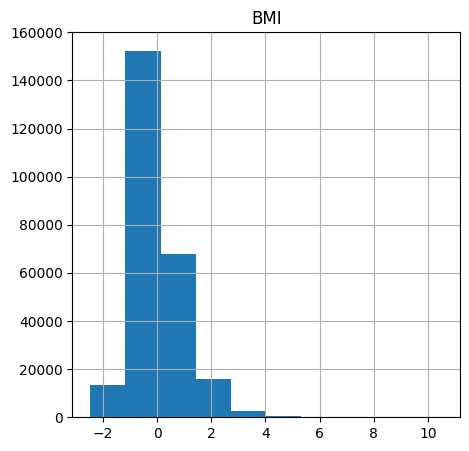

In [25]:
df.hist(column="BMI", figsize=(5, 5))
bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = bmi_scaler.transform(df[cols_to_scale])
fig = df.hist(column="BMI", figsize=(5, 5))

array([[<Axes: title={'center': 'MentHlth'}>]], dtype=object)

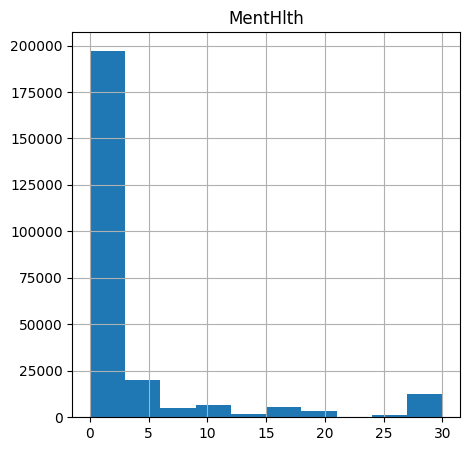

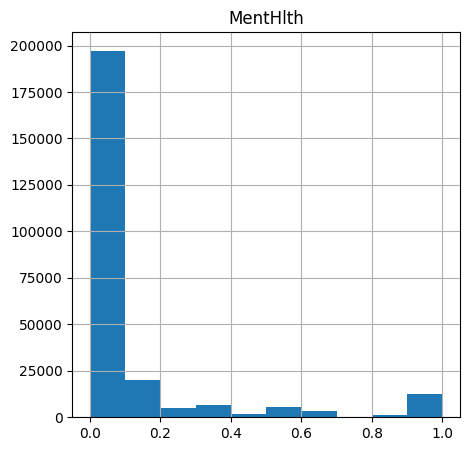

In [26]:
df.hist(column="MentHlth", figsize=(5, 5))
ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = ment_scaler.transform(df[cols_to_scale])
df.hist(column="MentHlth", figsize=(5, 5))

array([[<Axes: title={'center': 'PhysHlth'}>]], dtype=object)

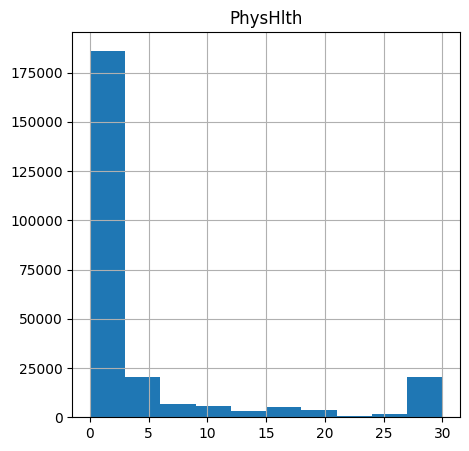

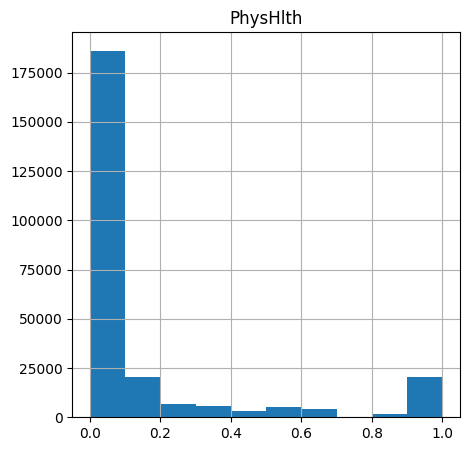

In [27]:
df.hist(column="PhysHlth", figsize=(5, 5))
phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = phys_scaler.transform(df[cols_to_scale])
df.hist(column="PhysHlth", figsize=(5, 5))

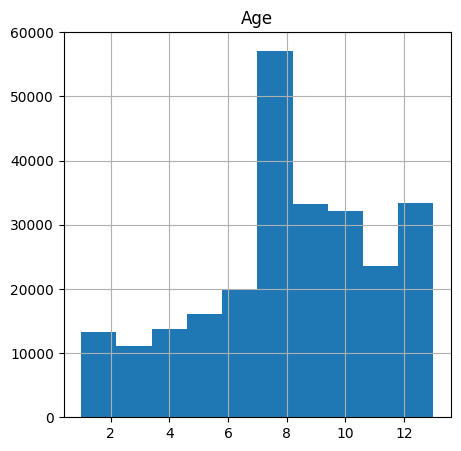

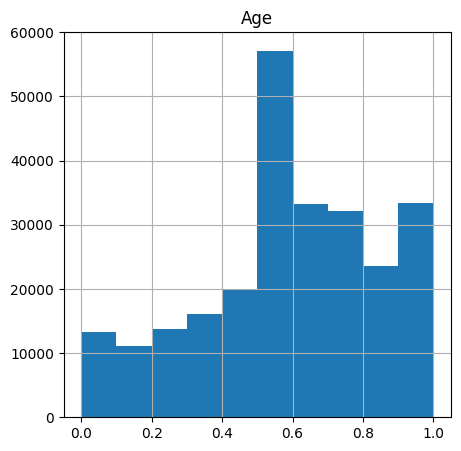

In [28]:
df.hist(column="Age", figsize=(5, 5))
age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = age_scaler.transform(df[cols_to_scale])
df.hist(column="Age", figsize=(5, 5))
import warnings
warnings.filterwarnings("ignore")

In [29]:
df["Sex"].value_counts(normalize=True)
gender = df["Sex"]
gender = gender.values.reshape(-1, 1)
encoder = OneHotEncoder(categories="auto", sparse_output=False)
gender_encoded = encoder.fit_transform(gender)
print(gender_encoded)
gender_encoded_df = pd.DataFrame(
    gender_encoded, columns=encoder.get_feature_names_out(["gender"])
)

df.reset_index(drop=True, inplace=True)
gender_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop("Sex", axis=1), gender_encoded_df], axis=1)
df_encoded

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,Diabetes_012,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,Age,gender_0.0,gender_1.0
0,0.0,1.0,1.0,1.757936,0.0,0.0,0.0,0.0,0.6,0.500000,1.0,0.666667,1.0,0.0
1,0.0,0.0,0.0,-0.511806,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.500000,1.0,0.0
2,0.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,0.666667,1.0,0.0
3,0.0,1.0,0.0,-0.209174,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.833333,1.0,0.0
4,0.0,1.0,1.0,-0.663122,0.0,0.0,1.0,0.0,0.1,0.000000,0.0,0.833333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,2.514516,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.333333,0.0,1.0
253676,1.0,1.0,1.0,-1.571019,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.833333,1.0,0.0
253677,0.0,0.0,0.0,-0.057858,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.083333,1.0,0.0
253678,0.0,1.0,0.0,-0.814438,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,1.0


In [30]:
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=df_encoded[["gender_0.0", "gender_1.0"]],
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")

smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [31]:
logistic_reg = LogisticRegression()
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "solver": ["saga"],
    "max_iter": [100, 200, 300],
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring="f1_weighted",  # Use F1-score as the scoring metric
    cv=5,
    refit=True,
)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)
# The most significant features

coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Best parameters:  {'C': 0.01, 'fit_intercept': True, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
F1-score on test set:  0.7537076737964167
Feature: Age, Coefficient: 1.8451892497434839
Feature: HighBP, Coefficient: 0.8399086759977831
Feature: HvyAlcoholConsump, Coefficient: -0.7416497657852023
Feature: HighChol, Coefficient: 0.6415532887441487
Feature: BMI, Coefficient: 0.5452066886867114
Feature: PhysHlth, Coefficient: 0.42947043172835164
Feature: HeartDiseaseorAttack, Coefficient: 0.41317028609434125
Feature: DiffWalk, Coefficient: 0.3933746940442515
Feature: Stroke, Coefficient: 0.18612222919686897
Feature: PhysActivity, Coefficient: -0.16619464817716822
Feature: MentHlth, Coefficient: 0.1520984943486138
Feature: gender_0.0, Coefficient: -0.09731671133342885
Feature: gender_1.0, Coefficient: 0.09261173462068123


Dataset shape:
(253680, 22)

Frequency of each label value:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64
(253680, 16)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


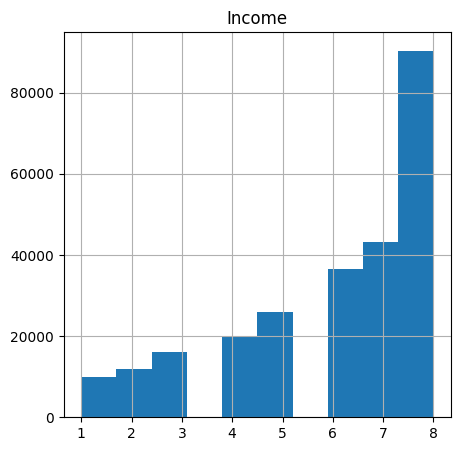

In [2]:
relative_path = "src\diabetes.csv"
absolute_path = os.path.join(os.getcwd(), relative_path)
with open(absolute_path, "r") as file:
    df = pd.read_csv(absolute_path)
# print(absolute_path)

print("Dataset shape:")
print(df.shape)
df.isnull().sum()
print("\nFrequency of each label value:")
print(df.Diabetes_012.value_counts())
print("\nDistribution of the target:")
print(df.Diabetes_012.value_counts(normalize=1))
print("\nFeatures:")
print(df.columns)
df.Diabetes_012.replace(2.0, 1.0, inplace=True)
print(df.Diabetes_012.value_counts(normalize=1))
df.columns = df.columns.str.replace(" ", "")
df.drop(
    ["Fruits", "Veggies", "NoDocbcCost",'AnyHealthcare','Smoker','Stroke'], axis=1, inplace=True
)

print(df.shape)
# df.hist(column="BMI", figsize=(5, 5))

bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = bmi_scaler.transform(df[cols_to_scale])
# fig = df.hist(column="BMI", figsize=(5, 5))
# df.hist(column="GenHlth", figsize=(5, 5))

gh_scaler = StandardScaler()
cols_to_scale = ["GenHlth"]
gh_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = gh_scaler.transform(df[cols_to_scale])
# df.hist(column="GenHlth", figsize=(5, 5))
# df.hist(column="MentHlth", figsize=(5, 5))

ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = ment_scaler.transform(df[cols_to_scale])
# df.hist(column="MentHlth", figsize=(5, 5))
# df.hist(column="PhysHlth", figsize=(5, 5))

phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = phys_scaler.transform(df[cols_to_scale])
# df.hist(column="PhysHlth", figsize=(5, 5))
# df.hist(column="Age", figsize=(5, 5))

age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = age_scaler.transform(df[cols_to_scale])
# df.hist(column="Age", figsize=(5, 5))

import warnings
warnings.filterwarnings("ignore")
# df.hist(column="Income", figsize=(5, 5))

income_cat_to_avg_map = {
    1: 5,
    2: 12.5,
    3: 17.5,
    4: 22.5,
    5: 30.0,
    6: 42.5,
    7: 62.5,
    8: 75,
}
# df = df.assign(Income=X.Income.map(income_cat_to_avg_map))

df.hist(column="Income", figsize=(5, 5))
inc_scaler = MinMaxScaler()
cols_to_scale = ["Income"]
inc_scaler.fit(df[cols_to_scale])
df[cols_to_scale] = inc_scaler.transform(df[cols_to_scale])
# df.hist(column="Income", figsize=(5, 5))
# df.hist(column="Education", figsize=(5, 5))

edu_scaler = MinMaxScaler()
cols_to_scale = ["Education"]
edu_scaler.fit(df[cols_to_scale])
df[cols_to_scale] = edu_scaler.transform(df[cols_to_scale])
# df.hist(column="Education", figsize=(5, 5))
# Sex!

df["Sex"].value_counts(normalize=True)
gender = df["Sex"]
gender = gender.values.reshape(-1, 1)
encoder = OneHotEncoder(categories="auto", sparse_output=False)
gender_encoded = encoder.fit_transform(gender)
print(gender_encoded)
gender_encoded_df = pd.DataFrame(
    gender_encoded, columns=encoder.get_feature_names_out(["gender"])
)

df.reset_index(drop=True, inplace=True)
gender_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop("Sex", axis=1), gender_encoded_df], axis=1)
df_encoded
df_encoded.iloc[:, 0].value_counts(normalize=1)
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=df_encoded[["gender_0.0", "gender_1.0"]],
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")

smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

Restarted Python 3.11.3

In [3]:
logistic_reg = LogisticRegression(random_state=0)
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [ 0.1, 1.0, 3.0, 5.0, 10.0],
    "solver": ["saga"],
    "max_iter": [100, 200, 300],
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring="f1_weighted",  # Use F1-score as the scoring metric
    cv=5,
    refit=True,
)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)
# The most significant features

coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Best parameters:  {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
F1-score on test set:  0.7648332966441127
Feature: Age, Coefficient: 1.9933045714468152
Feature: CholCheck, Coefficient: 1.5912553867190136
Feature: HvyAlcoholConsump, Coefficient: -0.7726749535474277
Feature: HighBP, Coefficient: 0.6849751336217698
Feature: GenHlth, Coefficient: 0.6284549084189511
Feature: HighChol, Coefficient: 0.5801324859526361
Feature: BMI, Coefficient: 0.5040401048157106
Feature: Income, Coefficient: -0.39189277055136484
Feature: PhysHlth, Coefficient: -0.30284335172705
Feature: gender_0.0, Coefficient: -0.24906434367218175
Feature: HeartDiseaseorAttack, Coefficient: 0.20499959131449316
Feature: MentHlth, Coefficient: -0.14933633950774983
Feature: Education, Coefficient: -0.1433114112771516
Feature: DiffWalk, Coefficient: 0.09567031865660985
Feature: PhysActivity, Coefficient: -0.03683633693732939
Feature: gender_1.0, Coefficient: 0.0019918536254538103


              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     42754
         1.0       0.34      0.76      0.47      7982

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.65     50736
weighted avg       0.85      0.73      0.76     50736


The confusion matrix:

[[0.72533564 0.27466436]
 [0.23841143 0.76158857]]


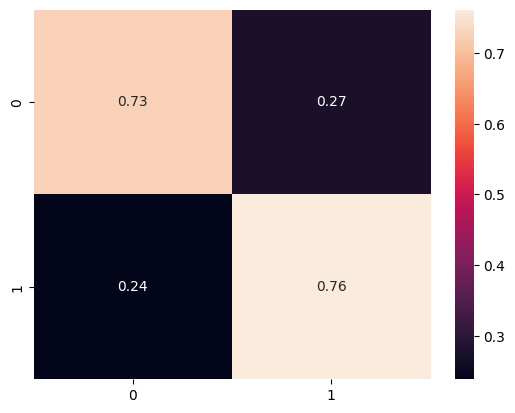

In [6]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

The accuracy of prediction on the whole imbalanced binary dataset:0.7631168374949716

The confusion matrix:

[[0.72340117 0.27659883]
 [0.24066338 0.75933662]]


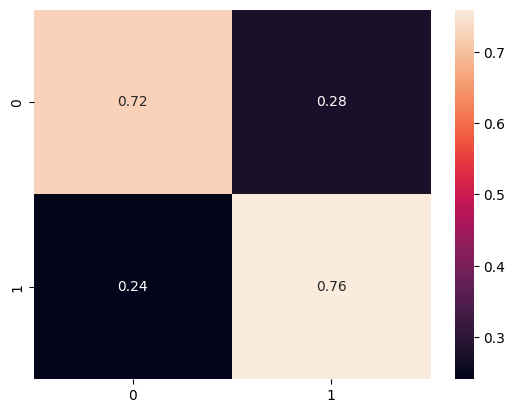

In [12]:
y_pred_all = best_model.predict(X)
print(f'The accuracy of prediction on the whole imbalanced binary dataset:{f1_score(y,y_pred_all,average="weighted")}\n')
print('The confusion matrix:\n')
conf_mat = confusion_matrix(y, y_pred_all, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [17]:
sgd = SGDClassifier()

param_dist = {
    'loss':['log', 'modified_huber'],
    'penalty': ['l1', 'l2'],
    'alpha': np.random.uniform(0, 0.01, 5),
    'learning_rate': ['constant', 'optimal'],
    'eta0': np.random.uniform(0, 0.1, 5),
    'max_iter': [100,200,300]
}
random_search = RandomizedSearchCV(
    sgd,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'penalty': 'l1', 'max_iter': 200, 'loss': 'modified_huber', 'learning_rate': 'optimal', 'eta0': 0.04713087653177746, 'alpha': 0.003950701583561241}
F1-score on test set:  0.7601246185939267


In [18]:
coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: Age, Coefficient: 0.7215237662678236
Feature: CholCheck, Coefficient: 0.35675647074128725
Feature: HighBP, Coefficient: 0.29743124768851387
Feature: HvyAlcoholConsump, Coefficient: -0.2639797090910214
Feature: GenHlth, Coefficient: 0.2554003232616745
Feature: HighChol, Coefficient: 0.21795104465704565
Feature: BMI, Coefficient: 0.17744051541242903
Feature: PhysHlth, Coefficient: -0.1067393421179176
Feature: HeartDiseaseorAttack, Coefficient: 0.07199926856566968
Feature: gender_0.0, Coefficient: -0.0694258269085132
Feature: DiffWalk, Coefficient: 0.04695692362904113
Feature: Smoker, Coefficient: 0.0
Feature: Stroke, Coefficient: 0.0
Feature: PhysActivity, Coefficient: 0.0
Feature: AnyHealthcare, Coefficient: 0.0
Feature: MentHlth, Coefficient: 0.0
Feature: gender_1.0, Coefficient: 0.0


              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     42754
         1.0       0.34      0.77      0.47      7982

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736


The confusion matrix:

[[0.71726622 0.28273378]
 [0.23277374 0.76722626]]


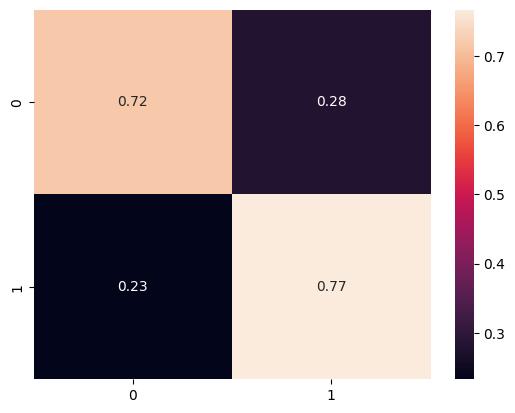

In [19]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)


In [39]:
xgb_classifier = XGBClassifier()
param_dist = {
    'n_estimators': np.random.randint(100, 1000, 4),  
    'max_depth': np.random.randint(1, 20, 5), 
    'learning_rate': np.random.uniform(0.01, 0.1, 4), 
    'subsample': np.random.uniform(0.5, 1.0, 4), 
    'colsample_bytree': np.random.uniform(0.5, 1.0, 4),  
    'gamma': np.random.uniform(0, 5, 4)  
}



# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    scoring=make_scorer(f1_score),
    random_state=42
)


# Fit the random search to your data
random_search.fit(X_train, y_train)
print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'subsample': 0.826642923985935, 'n_estimators': 863, 'max_depth': 13, 'learning_rate': 0.05828295439053702, 'gamma': 1.0100627358208807, 'colsample_bytree': 0.7602590225838985}
F1-score on test set:  0.8188644044054907


In [47]:
print(best_model.feature_importances_)

[0.23124814 0.05107835 0.06613772 0.06672846 0.01732144 0.01795353
 0.02134062 0.0170325  0.04610254 0.02036279 0.11090457 0.03746978
 0.05152547 0.02039873 0.18665372 0.01876661 0.01897499]


In [48]:
importances = best_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances_sorted = feature_importances.sort_values('Feature')

print(feature_importances_sorted)

                 Feature  Importance
14                   Age    0.186654
9          AnyHealthcare    0.020363
3                    BMI    0.066728
2              CholCheck    0.066138
13              DiffWalk    0.020399
10               GenHlth    0.110905
6   HeartDiseaseorAttack    0.021341
0                 HighBP    0.231248
1               HighChol    0.051078
8      HvyAlcoholConsump    0.046103
11              MentHlth    0.037470
7           PhysActivity    0.017033
12              PhysHlth    0.051525
4                 Smoker    0.017321
5                 Stroke    0.017954
15            gender_0.0    0.018767
16            gender_1.0    0.018975


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     42754
         1.0       0.46      0.29      0.35      7982

    accuracy                           0.84     50736
   macro avg       0.67      0.61      0.63     50736
weighted avg       0.81      0.84      0.82     50736


The confusion matrix:

[[0.93717547 0.06282453]
 [0.7116011  0.2883989 ]]


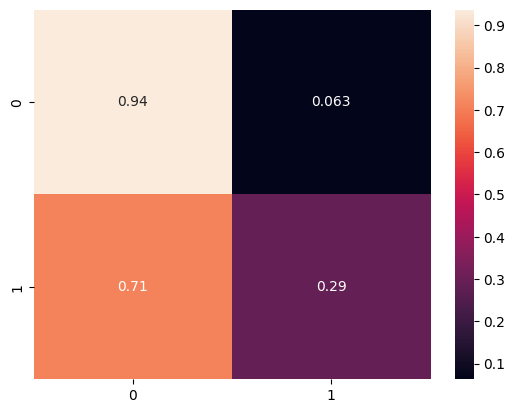

In [49]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [23]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [24]:
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")
smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

results.sort_values(by='val_accuracy', ascending=False)


,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
2,0.996659,0.998306,0.995007,0.996654,0.996659,0.831654,0.461132,0.323148,0.380002,0.625704,Random Forest
6,0.874905,0.885834,0.860742,0.873108,0.874905,0.823795,0.451375,0.481327,0.465870,0.685092,Gradient Boosting
1,0.996663,0.999449,0.993874,0.996654,0.996663,0.775013,0.316952,0.354321,0.334596,0.604628,Decision Tree
0,0.750782,0.738342,0.776879,0.757121,0.750782,0.732464,0.345908,0.758488,0.475132,0.743004,Logistic Regression
4,0.767106,0.738561,0.826932,0.780252,0.767106,0.724039,0.340819,0.779938,0.474354,0.746679,SVM
3,0.887679,0.829971,0.975124,0.896711,0.887679,0.710759,0.301719,0.617593,0.405389,0.673026,KNN
5,0.727452,0.702080,0.790228,0.743551,0.727452,0.685900,0.308017,0.776080,0.441005,0.722424,Naive Bayes
